In [1]:
from pathlib import Path

import lightning.pytorch as pl
from lightning.pytorch.tuner import Tuner

from dinora import PROJECT_ROOT
from dinora.models.torchnet.resnet import *
from dinora.datamodules import CompactDataModule

In [3]:
model = ResNetLight(
    res_channels=128,
    res_blocks=10,
    policy_channels=64,
    value_channels=16,
    value_lin_channels=64,
    learning_rate=0.8,
    lr_scheduler_gamma=1.0,
    lr_scheduler_freq=10000,
)

In [4]:
ccrl = CompactDataModule(
    # dataset_folder=dataset_dir,
    dataset_folder=PROJECT_ROOT / 'data' / 'converted_dataset', # local
    batch_size=2048
)

In [5]:
import torch
torch.set_float32_matmul_precision('highest')

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\saegl\miniconda3\envs\dinora_chess\lib\site-packages\lightning\pytorch\loops\utilities.py:70: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
You are using a CUDA device ('NVIDIA GeForce RTX 3050 Ti Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
DEBUG:fsspec.local:open file: c:/Users/saegl/projects/python/dinora/jupyter/.lr_find_12e23397-494c-4aa4-9f81-c697aef9e466.ckpt
c:\Users\saegl\miniconda3\envs\dinora_chess\lib\site

Adjusting learning rate of group 0 to 2.5119e-04.
Swith to C:\Users\saegl\projects\python\dinora\data\converted_dataset\1.pgntest.npz
Swith to C:\Users\saegl\projects\python\dinora\data\converted_dataset\2.pgntest.npz
Swith to C:\Users\saegl\projects\python\dinora\data\converted_dataset\1.pgntrain.npz


Finding best initial lr:  80%|████████  | 160/200 [01:34<00:23,  1.69it/s]


Swith to C:\Users\saegl\projects\python\dinora\data\converted_dataset\1.pgntest.npz
Swith to C:\Users\saegl\projects\python\dinora\data\converted_dataset\2.pgntest.npz


LR finder stopped early after 160 steps due to diverging loss.
Learning rate set to 0.0002722701308077912
Restoring states from the checkpoint path at c:\Users\saegl\projects\python\dinora\jupyter\.lr_find_12e23397-494c-4aa4-9f81-c697aef9e466.ckpt
DEBUG:fsspec.local:open file: c:/Users/saegl/projects/python/dinora/jupyter/.lr_find_12e23397-494c-4aa4-9f81-c697aef9e466.ckpt
Restored all states from the checkpoint at c:\Users\saegl\projects\python\dinora\jupyter\.lr_find_12e23397-494c-4aa4-9f81-c697aef9e466.ckpt
DEBUG:fsspec.local:open file: c:/Users/saegl/projects/python/dinora/jupyter/lightning_logs/version_2/hparams.yaml
C:\Users\saegl\AppData\Local\Temp\ipykernel_8508\46973576.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
DEBUG:matplotlib.ticker:vmin 3.019951720402019e-11 vmax 8.317637711026721
DEBUG:matplotlib.ticker:ticklocs array([1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05

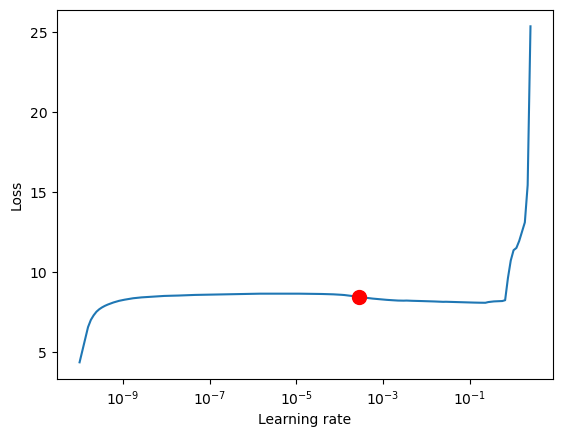

In [9]:
trainer = pl.Trainer()
tuner = Tuner(trainer)
lr_finder = tuner.lr_find(
    model,
    min_lr=1e-10,
    max_lr=1e3,
    datamodule=ccrl,
    num_training=200,
)
fig = lr_finder.plot(suggest=True)
fig.show()

In [10]:
lr_finder.suggestion()

0.0002722701308077912

In [25]:
1e-3

0.001